In [ ]:
!wget https://root.cern/download/root_v6.28.00.Linux-ubuntu20-x86_64-gcc9.4.tar.gz

--2023-02-20 16:03:35--  https://root.cern/download/root_v6.28.00.Linux-ubuntu20-x86_64-gcc9.4.tar.gz
Resolving root.cern (root.cern)... 188.184.49.144, 2001:1458:d00:55::100:c
Connecting to root.cern (root.cern)|188.184.49.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255191996 (243M) [application/x-gzip]
Saving to: ‘root_v6.28.00.Linux-ubuntu20-x86_64-gcc9.4.tar.gz’

root_v6.28.00.Linux 100%[===================>] 243.37M  23.6MB/s    in 12s     

2023-02-20 16:03:47 (21.1 MB/s) - ‘root_v6.28.00.Linux-ubuntu20-x86_64-gcc9.4.tar.gz’ saved [255191996/255191996]



In [ ]:
! tar xfvz root_v6.28.00.Linux-ubuntu20-x86_64-gcc9.4.tar.gz

Streaming output truncated to the last 5000 lines.
root/include/TSelectorList.h
root/include/TGLPlotCamera.h
root/include/RooHelpers.h
root/include/TNodeDiv.h
root/include/RooCmdArg.h
root/include/RooUniformBinning.h
root/include/RooRealConstant.h
root/include/TVirtualCollectionIterators.h
root/include/RooMath.h
root/include/RooTMathReg.h
root/include/TEveLineEditor.h
root/include/TEveChunkManager.h
root/include/TVirtualAuth.h
root/include/TSQLRow.h
root/include/THtml.h
root/include/TBufferText.h
root/include/TList.h
root/include/TVirtualX.h
root/include/TGeoPhysicalNode.h
root/include/RooRealAnalytic.h
root/include/RooNumIntConfig.h
root/include/THbookTree.h
root/include/TEnv.h
root/include/RooCBShape.h
root/include/TMatrixDBase.h
root/include/XrdPfc/
root/include/XrdPfc/XrdPfcDecision.hh
root/include/TSessionLogView.h
root/include/TGondzioSolver.h
root/include/TSelector.h
root/include/TPacketizerFile.h
root/include/TVector.h
root/include/RooCrystalBall.h
root/include/TDavixFile.h
roo

In [ ]:
#Getting all the dependencies needed to run ROOT in colabs
#In case the notebook crashes, only need to rerun this block
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
import sys
sys.path.append("root/bin/")
sys.path.append("root/include/")
sys.path.append("root/lib/")
import ctypes
ctypes.cdll.LoadLibrary('root/lib/libCore.so')
#ctypes.cdll.LoadLibrary('root/libThread.so')
ctypes.cdll.LoadLibrary('root/lib/libTreePlayer.so')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:9.3.0-1ubuntu2).
g++ set to manually installed.
gcc is already the newest version (4:9.3.0-1ubuntu2).
gcc set to manually installed.
gfortran is already the newest version (4:9.3.0-1ubuntu2).
libxext-dev is already the newest version (2:1.3.4-0ubuntu1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.3-0ubuntu1).
binutils is already the newest version (2.34-6ubuntu1.4).
binutils set to manually installed.
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
dpkg-dev is already the newest version (1.19.7ubuntu3.2).
dpkg-dev set to manually installed.
git is already the newest version (1:2.25.1-1ubuntu3.10).
libx11-dev is already the newest version (2:1.6.9-2ubuntu1.2).
libx11-dev set to manually installed.
tar is already the newest version (1.30+dfsg-7ubuntu0.20.04.2).
The following package was automatically i

<CDLL 'root/lib/libTreePlayer.so', handle 1fa7bb0 at 0x7fe4f58bc2e0>

In [ ]:
!source root/bin/thisroot.sh

45.0


Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


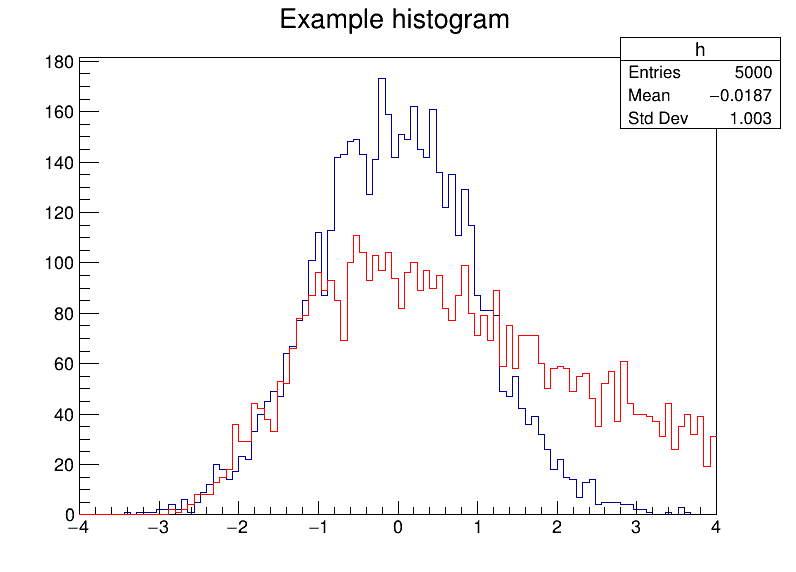

In [ ]:
#Checking whether ROOT is functioning properly (do this everytime to also import ROOT)
import ROOT
h = ROOT.TH1F("h","Example histogram",100,-4,4)
h.FillRandom("gaus")
h2 = ROOT.TH1F("h2","Example histogram",100,-4,4)
h2.FillRandom("landau")
h2.SetLineColor(2)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
h.Draw()
h2.Draw("same")
c.Draw()

In [ ]:
#Mounting google drive on the local repository seems to be the easiest way to
#import files into google colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Block to import all the ROOT functions that we will be using throughout this template
from ROOT import TFile
from ROOT import TLorentzVector
from ROOT import TH1F
from ROOT import TH2F

In [ ]:
#Simple command to check the contents on the .root file

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
#Always remember to check if the path is correct, and whether the drive has been
#mounted or not
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
f1 = TFile("/content/gdrive/MyDrive/Colab Notebooks/TFPAII/zjet.root")
f1.ls()

TFile**		/content/gdrive/MyDrive/Colab Notebooks/TFPAII/zjet.root	
 TFile*		/content/gdrive/MyDrive/Colab Notebooks/TFPAII/zjet.root	
  KEY: TTree	Tdata;3	zedjet_pythia_10000000_50.cmndTdata [current cycle]
  KEY: TTree	Tdata;2	zedjet_pythia_10000000_50.cmndTdata [backup cycle]


In [ ]:
#As we can see from the previous block, zjet contains a TTree called Tdata,
#where all the relevant data is stored
print("zjet.root has " + str(f1.Tdata.GetEntries()) + "entries.")
f1.Tdata.Print()

zjet.root has 500000entries.
******************************************************************************
*Tree    :Tdata     : zedjet_pythia_10000000_50.cmndTdata                    *
*Entries :   500000 : Total =       165231998 bytes  File  Size =   75716083 *
*        :          : Tree compression factor =   2.18                       *
******************************************************************************
*Br    0 :px        : vector<double>                                         *
*Entries :   500000 : Total  Size=   15020779 bytes  File Size  =    9269775 *
*Baskets :      209 : Basket Size=    5329408 bytes  Compression=   1.62     *
*............................................................................*
*Br    1 :py        : vector<double>                                         *
*Entries :   500000 : Total  Size=   15020779 bytes  File Size  =    9269233 *
*Baskets :      209 : Basket Size=    5329408 bytes  Compression=   1.62     *
*......................

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


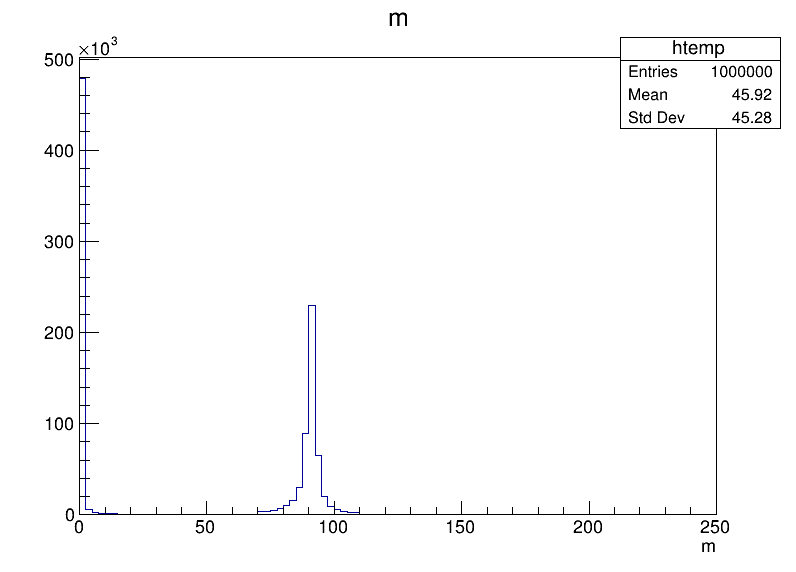

In [ ]:
#Lets draw simple plots with the variables we've seen
#We always need to establish a canvas in order to draw the plots
#Running ROOT in interactive mode can bypass this

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
f1.Tdata.Draw("m")
c.Draw()

In [ ]:
#Lets loop inside each branch to see what information is inside variables with
#type <vector>

maxEvents = 5
for index, event in enumerate(f1.Tdata):
  print("Event number " + str(index))
  print("There are " + str(len(event.id)) + " entries")
  if index >= maxEvents: break

print()

for index, event in enumerate(f1.Tdata):
  print("Event number " + str(index))
  for entries in event.id:
    print(entries)
  if index >= maxEvents: break


Event number 0
There are 2 entries
Event number 1
There are 2 entries
Event number 2
There are 2 entries
Event number 3
There are 2 entries
Event number 4
There are 2 entries
Event number 5
There are 2 entries

Event number 0
0
10
Event number 1
0
10
Event number 2
0
10
Event number 3
0
10
Event number 4
0
10
Event number 5
0
10


Warning in <TFile::Append>: Replacing existing TH1: TH2 (Potential memory leak).


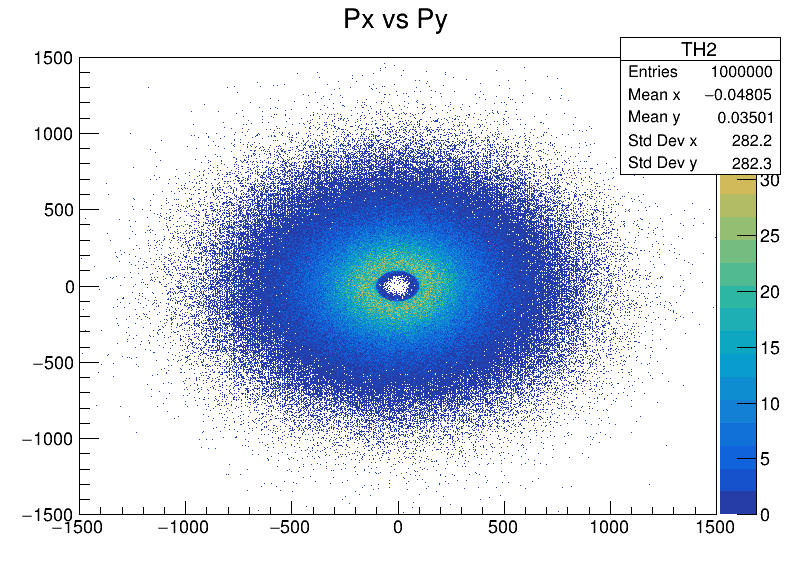

In [ ]:
# Plotting a simple 2D histogram
hist2 = TH2F("TH2","Px vs Py",1000,-1500,1500,1000,-1500,1500)

#Iterating over events in order to fill the histogram with the dimuon invariant mass
maxEvents = f1.Tdata.GetEntries()

for index, event in enumerate(f1.Tdata):
  for entrynumber, px in enumerate(event.px):
    hist2.Fill(px, event.py[entrynumber])
  if index >= maxEvents:break

#Drawing the histogram, in the previously created canvas, with logarithmic axes
hist2.Draw("colz")
c.SetLogy(False)
c.SetLogx(False)
c.Draw()